In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
 
import pickle

In [2]:
df = pd.read_csv('dane/music_data_v2.csv')
df.head()

,Tempo,STE_mean,RMS_std,ZCR_mean,ZCR_std,Bandwidth_std,Contrast0_mean,Contrast1_mean,Contrast4_mean,Contrast5_mean,...,Chroma3_std,Chroma4_std,Chroma5_std,Chroma6_std,Chroma7_std,Chroma8_std,Chroma9_std,Chroma10_std,Chroma11_std,Genre
0,117.453835,0.002751,0.024123,0.084384,0.031907,546.475523,29.507116,16.858170,24.017162,27.175570,...,0.184830,0.251512,0.351089,0.188364,0.323224,0.192700,0.382898,0.313732,0.180709,choir
1,129.199219,0.002129,0.028344,0.073145,0.035295,503.309131,27.492069,18.730857,23.637810,26.730100,...,0.157749,0.278516,0.328153,0.221604,0.418387,0.204494,0.344287,0.273368,0.177349,choir
2,117.453835,0.003823,0.027815,0.087358,0.027223,498.459158,29.143937,17.044031,23.018537,27.616315,...,0.177687,0.215747,0.358452,0.233619,0.345665,0.211821,0.359942,0.316724,0.215014,choir
3,117.453835,0.002063,0.026085,0.081553,0.035328,481.225069,27.005344,17.867018,24.152141,26.629940,...,0.175896,0.229170,0.333000,0.220233,0.410388,0.211764,0.333863,0.271708,0.173406,choir
4,117.453835,0.003401,0.031819,0.081016,0.030548,515.422504,28.922206,16.927557,23.418857,26.781137,...,0.187950,0.220705,0.366815,0.208286,0.339201,0.195336,0.373781,0.308540,0.195019,choir


# Klasyfikacja

## Funkcje pomocnicze

In [3]:
def split_df(df, test_size):
    # df - dataframe (last column = categorical attribute)
    # test_size - test set / all objects (0 - 1)
    # returns a dictionary with fields:
    # X_train/X_test - train/test set descriptive attributes matrix
    # y_train/y_test - train/test set decision attribute vector

    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=test_size, random_state=10)
    return {'X_train':X_train, 'X_test':X_test, 'y_train':y_train, 'y_test':y_test}

In [4]:
def train_verify_model(model, data, verbose=False):
    # fit model
    model.fit(data['X_train'], data['y_train'])

    # predict labels
    y_train_pred = model.predict(data['X_train'])
    y_test_pred = model.predict(data['X_test'])

    # evaluate train set label prediction
    accuracy = accuracy_score(data['y_train'], y_train_pred)
    precision = precision_score(data['y_train'], y_train_pred, average='weighted')
    recall = recall_score(data['y_train'], y_train_pred, average='weighted')
    f1 = f1_score(data['y_train'], y_train_pred, average='weighted')
    metrics_train = [accuracy, precision, recall, f1]
    
    if(verbose == True):
        print("\nZBIÓR UCZĄCY")
        conf_matrix_train = confusion_matrix(data['y_train'], y_train_pred)
        conf_matrix_heatmap(conf_matrix_train, model.classes_)
        report_train = classification_report(data['y_train'], y_train_pred, labels=model.classes_)
        print(report_train)
    
    # evaluate test set label prediction
    accuracy = accuracy_score(data['y_test'], y_test_pred)
    precision = precision_score(data['y_test'], y_test_pred, average='weighted')
    recall = recall_score(data['y_test'], y_test_pred, average='weighted')
    f1 = f1_score(data['y_test'], y_test_pred, average='weighted')
    metrics_test = [accuracy, precision, recall, f1]
    
    if(verbose == True):
        print("\nZBIÓR TESTOWY")
        conf_matrix_test = confusion_matrix(data['y_test'], y_test_pred)
        conf_matrix_heatmap(conf_matrix_test, model.classes_)
        report_test = classification_report(data['y_test'], y_test_pred, labels=model.classes_)
        print(report_test)
    
    return metrics_train, metrics_test

In [5]:
def conf_matrix_heatmap(conf_matrix, labels):
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels).plot()
    fig = disp.figure_
    fig.set_figwidth(len(labels) / 1.5)
    fig.set_figheight(len(labels) / 1.5)
    ax = disp.ax_
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    plt.show()

## Podział zbioru na zbiór uczący i testowy

In [7]:
df_div = split_df(df, 0.3)
print('Liczba obiektów zbioru uczącego: ', len(df_div['X_train']))
print('Liczba obiektów zbioru testowego: ', len(df_div['X_test']))

Liczba obiektów zbioru uczącego:  700
Liczba obiektów zbioru testowego:  300


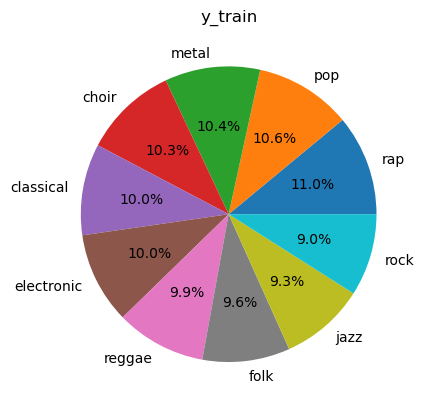

In [8]:
vector = df_div['y_train']
series = pd.Series(vector)
value_counts = series.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(value_counts, labels=series.unique(), autopct='%1.1f%%')
plt.title('y_train')
plt.show()

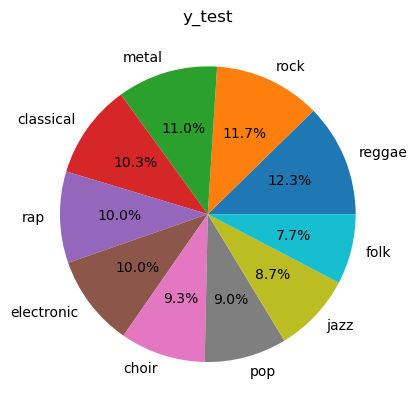

In [9]:
vector = df_div['y_test']
series = pd.Series(vector)
value_counts = series.value_counts()

fig1, ax1 = plt.subplots()
plt.title('y_test')
ax1.pie(value_counts, labels=series.unique(), autopct='%1.1f%%')
plt.show()

Losowy podział zbioru na część uczącą i testową zapewnia mniej więcej równą ilość obiektów z każdej klasy.

## Standaryzacja

In [16]:
standard_scaler = StandardScaler();
standardised_X_train = pd.DataFrame(standard_scaler.fit_transform(df_div['X_train']), columns=df_div['X_train'].columns)
df_div['X_train'] = standardised_X_train
df_div['X_train'].describe()

,Tempo,STE_mean,RMS_std,ZCR_mean,ZCR_std,Bandwidth_std,Contrast0_mean,Contrast1_mean,Contrast4_mean,Contrast5_mean,...,Chroma2_std,Chroma3_std,Chroma4_std,Chroma5_std,Chroma6_std,Chroma7_std,Chroma8_std,Chroma9_std,Chroma10_std,Chroma11_std
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,...,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02
mean,-2.486900e-16,1.560656e-16,-1.129255e-16,-5.075305e-18,-3.184754e-16,-3.045183e-16,-4.212503e-16,9.084796e-16,5.912731e-16,-2.727977e-17,...,-3.552714e-17,-5.608212e-16,-7.638334e-16,-1.116567e-16,-6.039613e-16,-1.624098e-16,-5.481330e-16,-8.628019e-17,-9.643080e-17,-9.643080e-17
std,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,...,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00
min,-3.175585e+00,-8.625123e-01,-1.461680e+00,-2.128019e+00,-1.780346e+00,-2.083728e+00,-2.573246e+00,-2.407255e+00,-1.825353e+00,-1.509404e+00,...,-3.602577e+00,-3.459035e+00,-4.043609e+00,-3.589430e+00,-3.751952e+00,-4.476201e+00,-3.389964e+00,-3.705782e+00,-3.073601e+00,-3.402631e+00
25%,-6.177569e-01,-7.289573e-01,-7.562536e-01,-7.646699e-01,-7.619910e-01,-7.157034e-01,-5.954284e-01,-7.013423e-01,-7.319722e-01,-7.283994e-01,...,-5.794717e-01,-6.342816e-01,-5.970895e-01,-6.307904e-01,-6.058224e-01,-5.764072e-01,-6.076349e-01,-6.126938e-01,-6.152041e-01,-5.398256e-01
50%,-7.926681e-02,-4.022631e-01,-2.491373e-01,-1.460057e-01,-1.487438e-01,-9.811377e-02,-1.255207e-01,-1.800045e-01,-1.400492e-01,-3.201571e-01,...,3.704032e-02,-1.843271e-02,1.065080e-01,6.135321e-02,5.131502e-02,8.852563e-02,1.801278e-02,1.058341e-01,4.993200e-03,4.027922e-02
75%,5.725896e-01,3.835432e-01,5.019425e-01,6.581527e-01,6.166647e-01,6.035015e-01,4.958365e-01,4.774025e-01,5.480509e-01,5.075363e-01,...,6.877650e-01,6.510864e-01,6.814620e-01,6.669910e-01,6.343355e-01,7.402275e-01,6.427198e-01,6.652231e-01,6.604601e-01,6.433523e-01
max,5.550402e+00,4.090316e+00,4.053114e+00,4.130300e+00,4.639384e+00,4.358207e+00,3.942555e+00,4.107499e+00,3.670057e+00,4.337701e+00,...,2.728392e+00,3.068229e+00,2.422124e+00,2.862799e+00,2.915919e+00,2.174150e+00,2.666190e+00,2.703037e+00,2.803701e+00,2.734115e+00


In [18]:
standardised_X_test = pd.DataFrame(standard_scaler.fit_transform(df_div['X_test']), columns=df_div['X_test'].columns)
df_div['X_test'] = standardised_X_test
df_div['X_test'].describe()

,Tempo,STE_mean,RMS_std,ZCR_mean,ZCR_std,Bandwidth_std,Contrast0_mean,Contrast1_mean,Contrast4_mean,Contrast5_mean,...,Chroma2_std,Chroma3_std,Chroma4_std,Chroma5_std,Chroma6_std,Chroma7_std,Chroma8_std,Chroma9_std,Chroma10_std,Chroma11_std
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,...,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,-1.006602e-16,-4.144833e-17,9.177844e-17,-2.812565e-17,2.427688e-16,1.361874e-16,7.697546e-16,1.273056e-16,7.238654e-16,2.457294e-16,...,-1.006602e-16,-4.204045e-16,-7.253457e-17,-5.921189e-17,-5.935992e-16,-6.661338e-16,-9.977204e-16,-5.639933e-16,-5.329071e-16,-2.782959e-16
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,...,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-1.961595e+00,-9.260182e-01,-1.436988e+00,-1.975209e+00,-1.622886e+00,-1.870356e+00,-2.642875e+00,-1.910564e+00,-1.648199e+00,-1.558692e+00,...,-3.308705e+00,-3.241472e+00,-3.119130e+00,-2.728283e+00,-3.878661e+00,-3.287225e+00,-3.114797e+00,-3.376850e+00,-3.407548e+00,-4.214298e+00
25%,-6.491439e-01,-7.367711e-01,-7.902442e-01,-7.810175e-01,-6.617232e-01,-7.242058e-01,-5.767268e-01,-6.678995e-01,-6.691313e-01,-6.974542e-01,...,-5.776693e-01,-5.370673e-01,-6.640085e-01,-4.865599e-01,-5.866787e-01,-5.746844e-01,-5.995356e-01,-5.958217e-01,-6.919800e-01,-5.244030e-01
50%,-1.134495e-01,-3.600426e-01,-2.262751e-01,-3.597507e-02,-1.375236e-01,-1.019921e-01,-8.978271e-02,-2.219797e-01,-2.691717e-01,-3.664396e-01,...,1.052744e-01,1.157712e-02,4.268451e-02,1.344823e-01,1.129293e-02,1.629265e-01,7.638425e-03,9.847345e-02,6.377555e-02,5.788962e-02
75%,5.350227e-01,4.516727e-01,5.772372e-01,6.471926e-01,5.602617e-01,5.143976e-01,5.190431e-01,5.419514e-01,5.385452e-01,5.214295e-01,...,7.345568e-01,5.715530e-01,6.090747e-01,6.697960e-01,5.745826e-01,6.737496e-01,5.847133e-01,6.603656e-01,6.530849e-01,5.844787e-01
max,2.350745e+00,3.265947e+00,3.569135e+00,2.999148e+00,5.079279e+00,3.615935e+00,4.560250e+00,3.643087e+00,3.942773e+00,3.714468e+00,...,2.389767e+00,2.680256e+00,2.287572e+00,2.431161e+00,2.912151e+00,2.237498e+00,2.783324e+00,2.055800e+00,2.864899e+00,2.999764e+00


In [20]:
with open('classification_app/pickles/scaler.pkl', 'wb') as f:
    pickle.dump(standard_scaler, f)

## Regresja logistyczna


ZBIÓR UCZĄCY


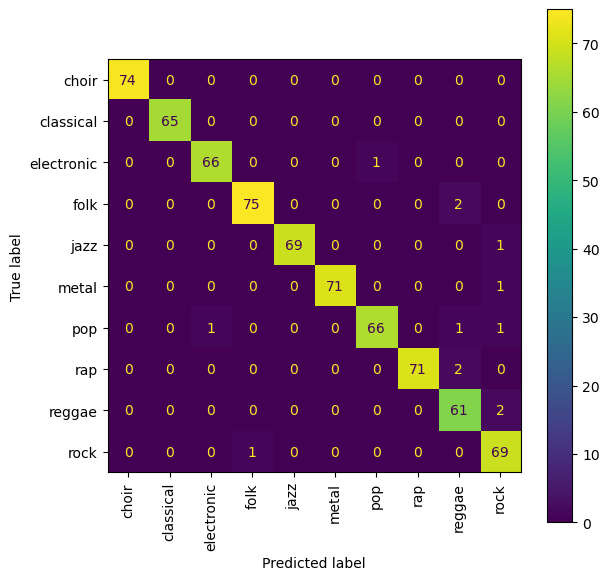

              precision    recall  f1-score   support

       choir       1.00      1.00      1.00        74
   classical       1.00      1.00      1.00        65
  electronic       0.99      0.99      0.99        67
        folk       0.99      0.97      0.98        77
        jazz       1.00      0.99      0.99        70
       metal       1.00      0.99      0.99        72
         pop       0.99      0.96      0.97        69
         rap       1.00      0.97      0.99        73
      reggae       0.92      0.97      0.95        63
        rock       0.93      0.99      0.96        70

    accuracy                           0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700


ZBIÓR TESTOWY


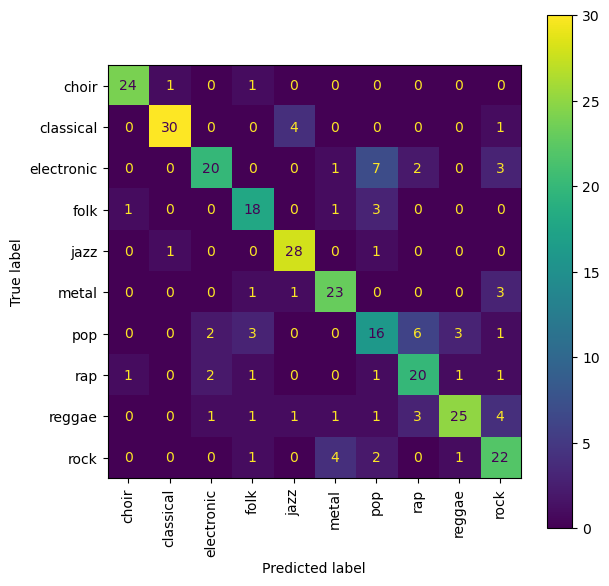

              precision    recall  f1-score   support

       choir       0.92      0.92      0.92        26
   classical       0.94      0.86      0.90        35
  electronic       0.80      0.61      0.69        33
        folk       0.69      0.78      0.73        23
        jazz       0.82      0.93      0.87        30
       metal       0.77      0.82      0.79        28
         pop       0.52      0.52      0.52        31
         rap       0.65      0.74      0.69        27
      reggae       0.83      0.68      0.75        37
        rock       0.63      0.73      0.68        30

    accuracy                           0.75       300
   macro avg       0.76      0.76      0.75       300
weighted avg       0.76      0.75      0.75       300



In [19]:
logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=275)
train_verify_model(logistic_regression_model, df_div, verbose=True);

W zbiorze testowym obiekty klasy `pop` były często błędnie rozpoznawane jako inne klasy (w szczególności `rap`), również wiele obiektów innych klas było błędnie rozpoznawane jako `pop` (w szczególności `electronic`). Niektóre obiekty klasy `rap` zostały błędnie rozpoznane jako `rock` oraz obiekty klasy `classical` jako `jazz`.

In [21]:
with open('classification_app/pickles/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logistic_regression_model, f)

## Drzewo decyzyjne

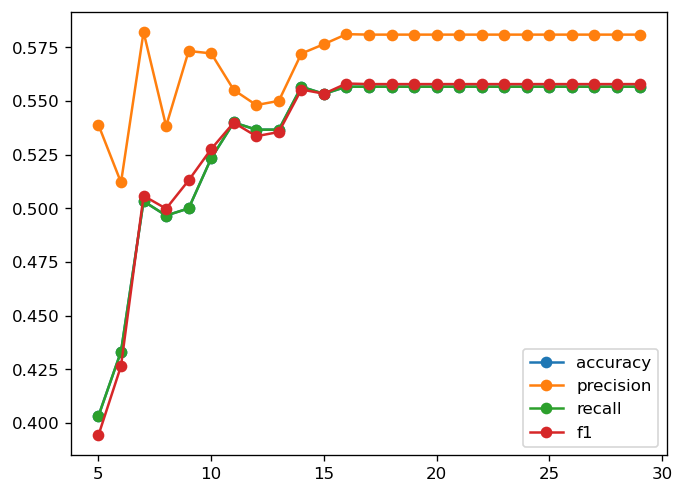

In [22]:
depth_values = range(5, 30)
measures = np.zeros((len(depth_values), 4))
i = 0
for depth in depth_values:
    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=10)
    _, measures_test = train_verify_model(model, df_div)
    measures[i] = measures_test
    i += 1

plt.figure(dpi=120)
labels = ['accuracy', 'precision', 'recall', 'f1']
for i in range(len(measures_test)):
    plt.plot(depth_values, measures[:, i], 'o-', label=labels[i])
plt.legend()
plt.show()

Przeanalizowawszy wartości **dokładności (accuracy)**, **precyzji (precision)**, **czułości (recall)** i **miary f1** dla zbioru testowego, wybrałam drzewo decyzyjne o *głębokości = 17*. Dalsze pogłębianie drzewa nie ma wpływu na wartości badanych miar.


ZBIÓR UCZĄCY


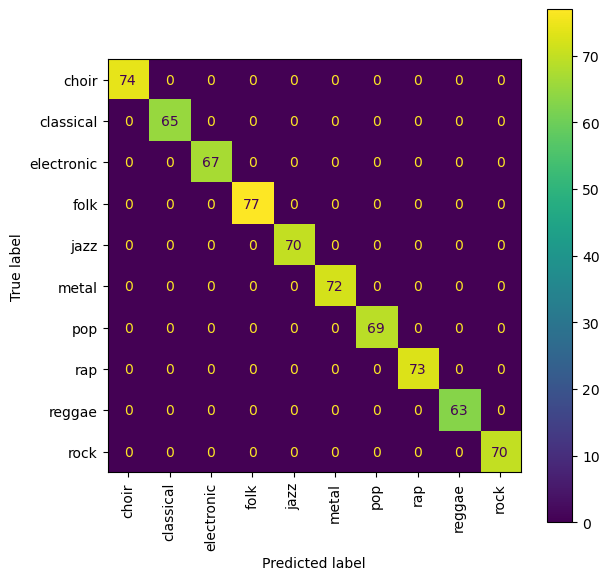

              precision    recall  f1-score   support

       choir       1.00      1.00      1.00        74
   classical       1.00      1.00      1.00        65
  electronic       1.00      1.00      1.00        67
        folk       1.00      1.00      1.00        77
        jazz       1.00      1.00      1.00        70
       metal       1.00      1.00      1.00        72
         pop       1.00      1.00      1.00        69
         rap       1.00      1.00      1.00        73
      reggae       1.00      1.00      1.00        63
        rock       1.00      1.00      1.00        70

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


ZBIÓR TESTOWY


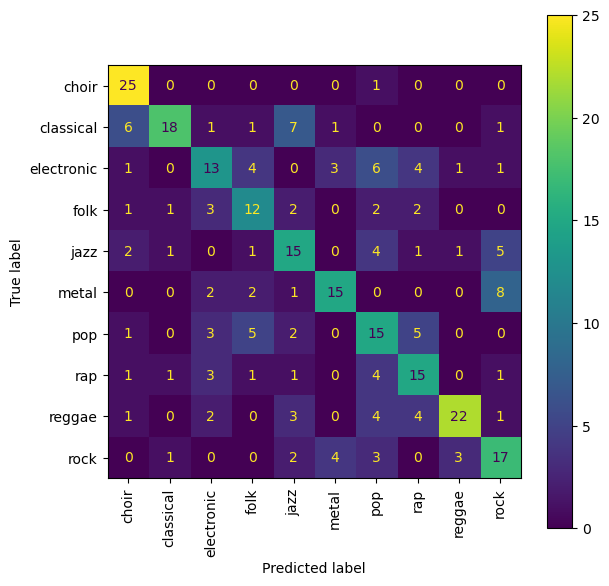

              precision    recall  f1-score   support

       choir       0.66      0.96      0.78        26
   classical       0.82      0.51      0.63        35
  electronic       0.48      0.39      0.43        33
        folk       0.46      0.52      0.49        23
        jazz       0.45      0.50      0.48        30
       metal       0.65      0.54      0.59        28
         pop       0.38      0.48      0.43        31
         rap       0.48      0.56      0.52        27
      reggae       0.81      0.59      0.69        37
        rock       0.50      0.57      0.53        30

    accuracy                           0.56       300
   macro avg       0.57      0.56      0.56       300
weighted avg       0.58      0.56      0.56       300



In [23]:
decision_tree_model = tree.DecisionTreeClassifier(max_depth=17, random_state=10)
train_verify_model(decision_tree_model, df_div, verbose=True);

W zbiorze testowym obiekty klasy `metal` były często błędnie rozpoznawane jako `rock`, obiekty klasy `electronic` jako `pop`, obiekty klasy `classical` jako `jazz`, obiekty klasy `rap` jako `electronic` oraz obiekty klasy `reggae` jako `rap`. Wiele z tych pomyłek pokrywa się z postawionymi wcześniej hipotezami na temat podobieństwa i rozróżnialności klas.

In [24]:
with open('classification_app/pickles/decision_tree_model.pkl', 'wb') as f:
    pickle.dump(decision_tree_model, f)

## Las losowy

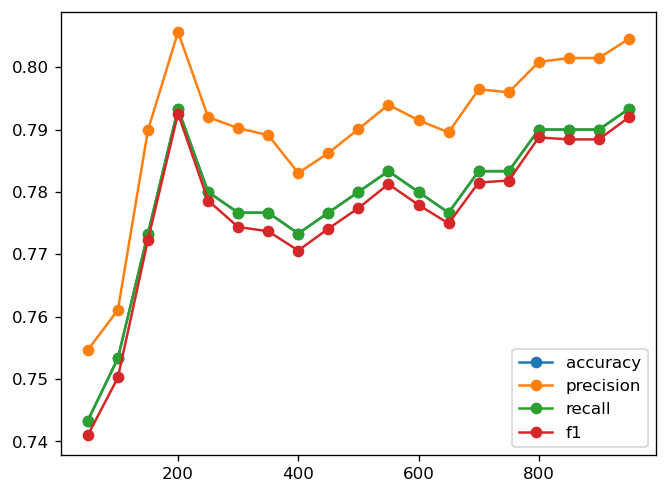

In [25]:
n_estimators_values = range(50, 1000, 50)
measures = np.zeros((len(n_estimators_values), 4))
i = 0
for n_estimators in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=10)
    _, measures_test = train_verify_model(model, df_div)
    measures[i] = measures_test
    i += 1

plt.figure(dpi=120)
labels = ['accuracy', 'precision', 'recall', 'f1']
for i in range(len(measures_test)):
    plt.plot(n_estimators_values, measures[:, i], 'o-', label=labels[i])
plt.legend()
plt.show()

Przeanalizowawszy wartości **dokładności (accuracy)**, **precyzji (precision)**, **czułości (recall)** i **miary f1** dla zbioru testowego, wybrałam las losowy o *liczbie drzew = 200*. Dalsze zwiększanie liczby drzew pogarsza wartości badanych miar.


ZBIÓR UCZĄCY


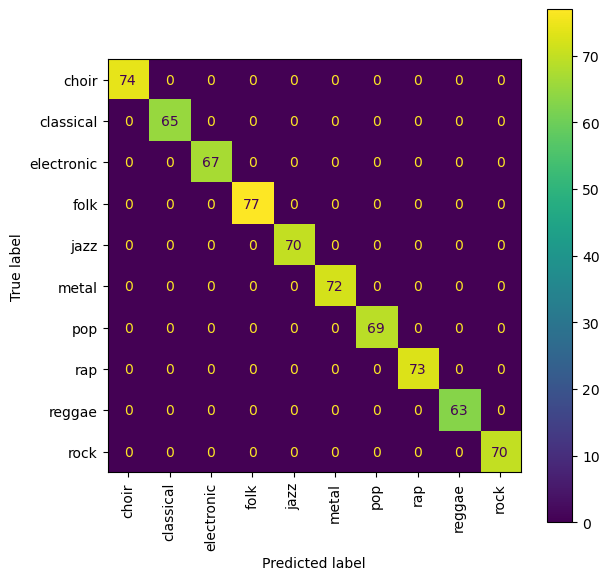

              precision    recall  f1-score   support

       choir       1.00      1.00      1.00        74
   classical       1.00      1.00      1.00        65
  electronic       1.00      1.00      1.00        67
        folk       1.00      1.00      1.00        77
        jazz       1.00      1.00      1.00        70
       metal       1.00      1.00      1.00        72
         pop       1.00      1.00      1.00        69
         rap       1.00      1.00      1.00        73
      reggae       1.00      1.00      1.00        63
        rock       1.00      1.00      1.00        70

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


ZBIÓR TESTOWY


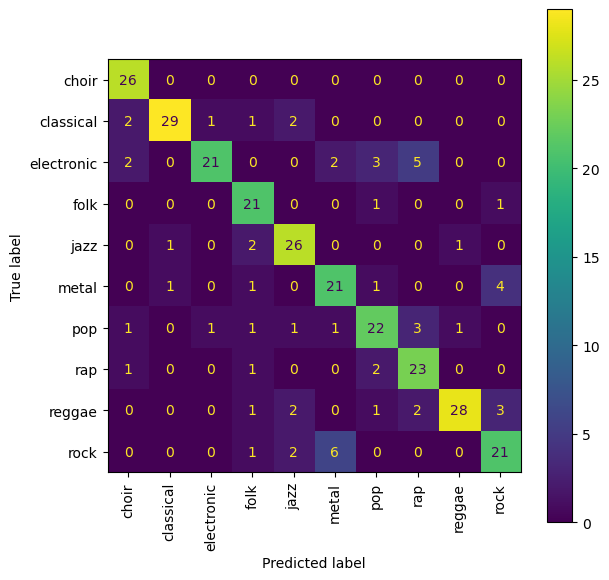

              precision    recall  f1-score   support

       choir       0.81      1.00      0.90        26
   classical       0.94      0.83      0.88        35
  electronic       0.91      0.64      0.75        33
        folk       0.72      0.91      0.81        23
        jazz       0.79      0.87      0.83        30
       metal       0.70      0.75      0.72        28
         pop       0.73      0.71      0.72        31
         rap       0.70      0.85      0.77        27
      reggae       0.93      0.76      0.84        37
        rock       0.72      0.70      0.71        30

    accuracy                           0.79       300
   macro avg       0.80      0.80      0.79       300
weighted avg       0.81      0.79      0.79       300



In [27]:
random_forest_model = RandomForestClassifier(n_estimators=200, random_state=10)
train_verify_model(random_forest_model, df_div, verbose=True);

W zbiorze testowym wiele obiektów (ok. 1/4) klasy `rock` zostało błędnie rozpoznanych jako `metal`. Niektóre obiekty klasy `pop` zostały błędnie rozpoznane jako `electronic` oraz obiekty klasy `reggae` jako `rock`.

In [28]:
with open('classification_app/pickles/random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest_model, f)

## Porównanie klasyfikatorów

In [29]:
models = [LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=275),
          tree.DecisionTreeClassifier(max_depth=17, random_state=10),
          RandomForestClassifier(n_estimators=400, random_state=10)]
measure_results = np.zeros((len(models), 4))
model_nr = 0
for model in models:
    _, measures_test = train_verify_model(model, df_div)
    measure_results[model_nr] = measures_test
    model_nr += 1

measures = ['accuracy', 'precision', 'recall', 'f1']
classifiers = ['LogisticRegression', 'DecisionTree', 'RandomForest']
measures_df = pd.DataFrame(measure_results, columns=measures, index=classifiers)
measures_df

,accuracy,precision,recall,f1
LogisticRegression,0.753333,0.761393,0.753333,0.753324
DecisionTree,0.556667,0.580930,0.556667,0.557885
RandomForest,0.773333,0.783041,0.773333,0.770602


<Axes: >

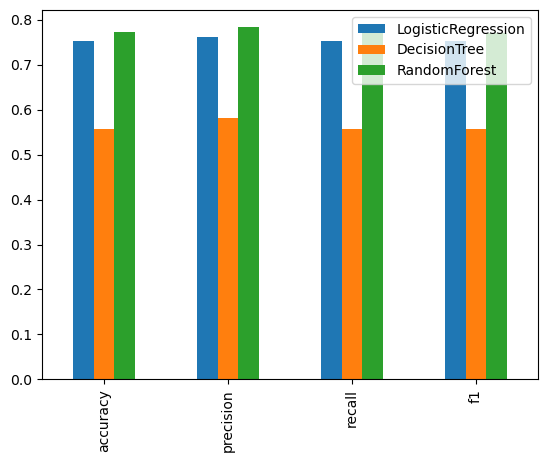

In [30]:
measures_df.T.plot.bar()

Średnio, dla zbioru testowego, las losowy cechował się najwyższymi wartościami miar **dokładności**, **precyzji**, **czułości** i **miary f1**. Najgorzej wypadło drzewo decyzyjne.